In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

In [30]:
df=pd.read_csv("brent-daily.csv")

In [31]:
df

Date  Price
0     1987-05-20  18.63
1     1987-05-21  18.45
2     1987-05-22  18.55
3     1987-05-25  18.60
4     1987-05-26  18.63
...          ...    ...
9051  2023-01-17  84.38
9052  2023-01-18  83.78
9053  2023-01-19  85.08
9054  2023-01-20  86.96
9055  2023-01-23  87.54

[9056 rows x 2 columns]

In [32]:
df=df.set_index('Date')

In [33]:
df.index=pd.to_datetime(df.index)

In [6]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [7]:
df

Price  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                        
1987-05-20  18.63          2        2      5  1987        140          20   
1987-05-21  18.45          3        2      5  1987        141          21   
1987-05-22  18.55          4        2      5  1987        142          22   
1987-05-25  18.60          0        2      5  1987        145          25   
1987-05-26  18.63          1        2      5  1987        146          26   
...           ...        ...      ...    ...   ...        ...         ...   
2023-01-17  84.38          1        1      1  2023         17          17   
2023-01-18  83.78          2        1      1  2023         18          18   
2023-01-19  85.08          3        1      1  2023         19          19   
2023-01-20  86.96          4        1      1  2023         20          20   
2023-01-23  87.54          0        1      1  2023         23          23   

            weekofyear  
Date                    
1987-05-20          21  
1987-05-21          21  
1987-05-22          21  
1987-05-25          22  
1987-05-26          22  
...                ...  
2023-01-17           3  
2023-01-18           3  
2023-01-19           3  
2023-01-20           3  
2023-01-23           4  

[9056 rows x 8 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9056 entries, 1987-05-20 to 2023-01-23
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       9056 non-null   float64
 1   dayofweek   9056 non-null   int64  
 2   quarter     9056 non-null   int64  
 3   month       9056 non-null   int64  
 4   year        9056 non-null   int64  
 5   dayofyear   9056 non-null   int64  
 6   dayofmonth  9056 non-null   int64  
 7   weekofyear  9056 non-null   UInt32 
dtypes: UInt32(1), float64(1), int64(6)
memory usage: 610.2 KB


## Data Visualization

<AxesSubplot:xlabel='month', ylabel='year'>

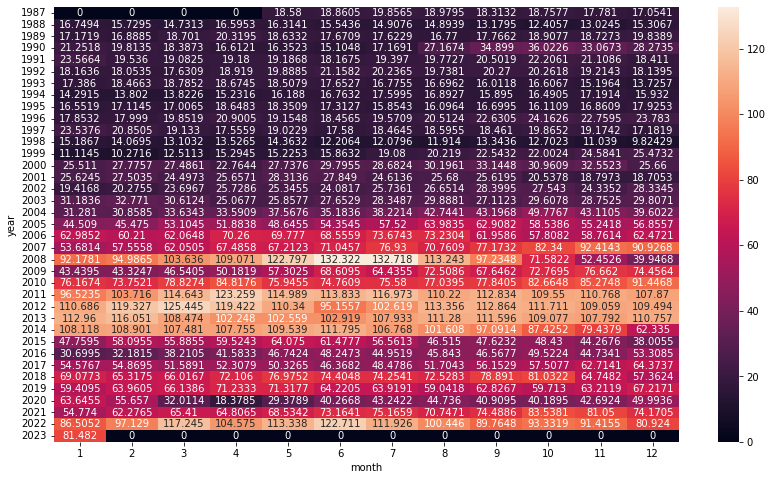

In [9]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

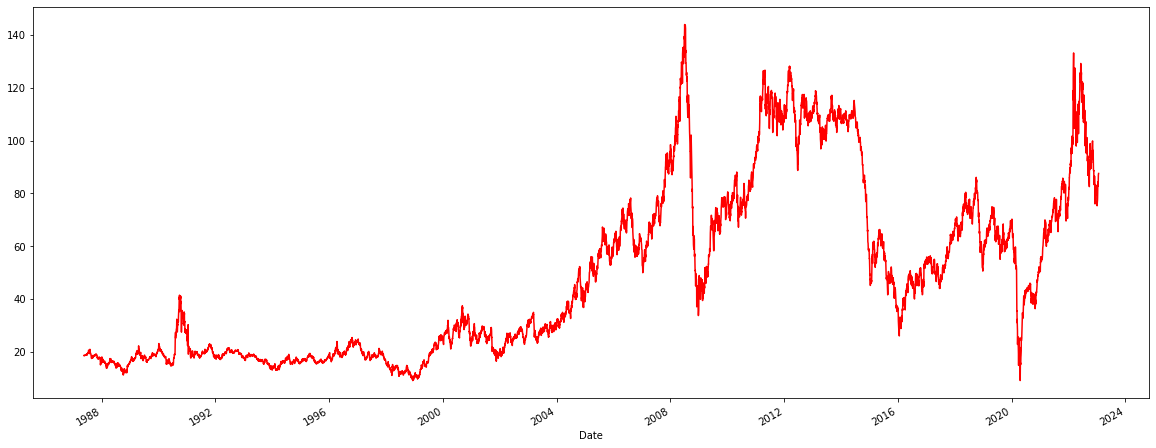

In [10]:
df['Price'].plot(figsize=(20, 8),color='red')
plt.show()

<AxesSubplot:xlabel='month', ylabel='Price'>

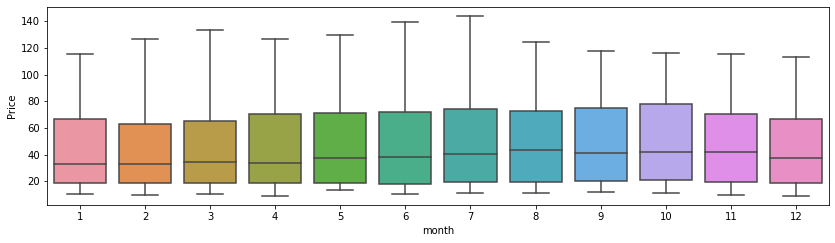

In [11]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Price",data=df)

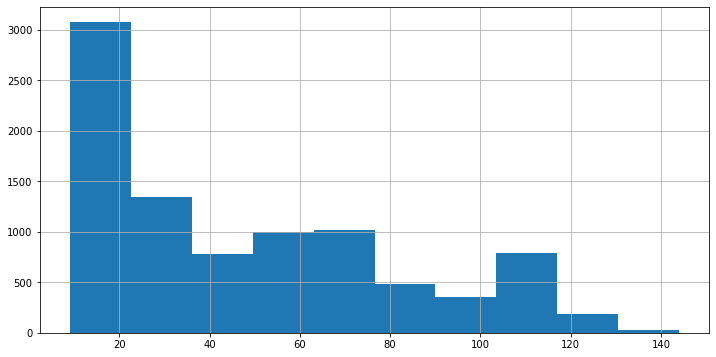

In [12]:
df.Price.hist(figsize=(12,6))
plt.show()

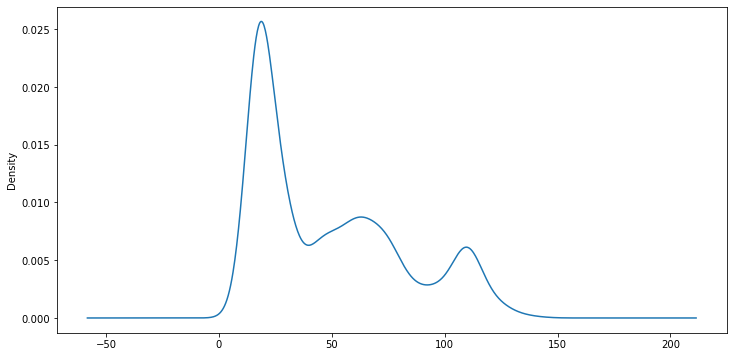

In [13]:
df.Price.plot(kind='kde', figsize=(12,6))
plt.show()

In [14]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

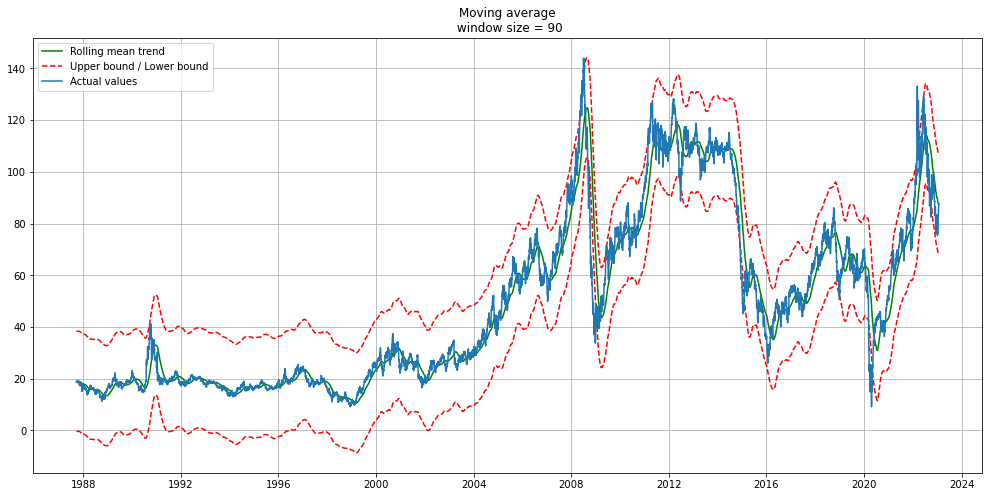

In [15]:
plot_moving_average(df.Price, 90, plot_intervals=True)

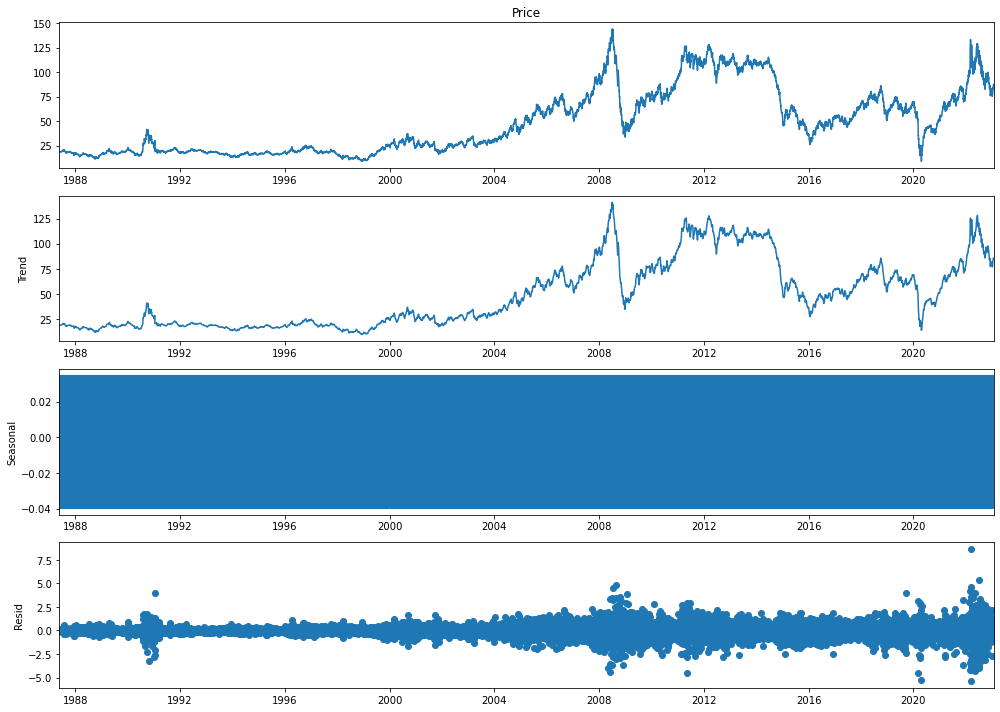

In [16]:
decompose_ts_add = seasonal_decompose(df.Price,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


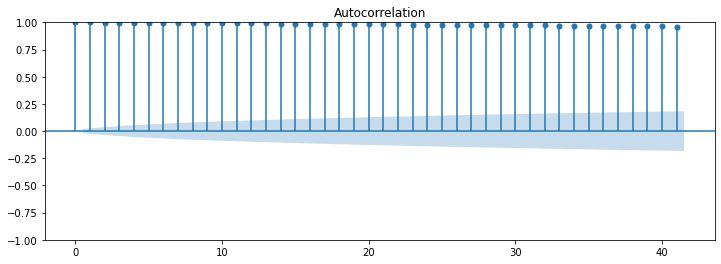

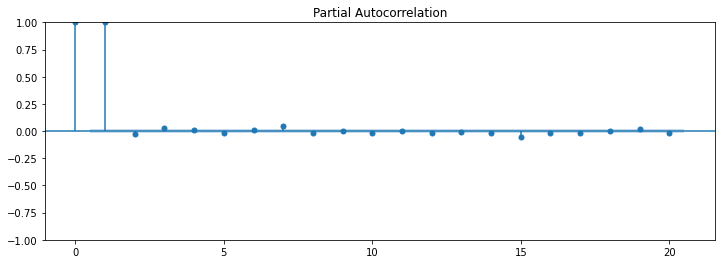

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Price,lags=41)
    tsa_plots.plot_pacf(df.Price,lags=20)
    plt.show()

In [18]:
df

Price  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                        
1987-05-20  18.63          2        2      5  1987        140          20   
1987-05-21  18.45          3        2      5  1987        141          21   
1987-05-22  18.55          4        2      5  1987        142          22   
1987-05-25  18.60          0        2      5  1987        145          25   
1987-05-26  18.63          1        2      5  1987        146          26   
...           ...        ...      ...    ...   ...        ...         ...   
2023-01-17  84.38          1        1      1  2023         17          17   
2023-01-18  83.78          2        1      1  2023         18          18   
2023-01-19  85.08          3        1      1  2023         19          19   
2023-01-20  86.96          4        1      1  2023         20          20   
2023-01-23  87.54          0        1      1  2023         23          23   

            weekofyear  
Date                    
1987-05-20          21  
1987-05-21          21  
1987-05-22          21  
1987-05-25          22  
1987-05-26          22  
...                ...  
2023-01-17           3  
2023-01-18           3  
2023-01-19           3  
2023-01-20           3  
2023-01-23           4  

[9056 rows x 8 columns]

In [53]:
train_df = df.loc[:'2018-01-01']
test_df = df.loc['2018-01-01':]

In [54]:
train_df

Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2017-12-21  64.64
2017-12-22  64.61
2017-12-27  66.03
2017-12-28  66.80
2017-12-29  66.73

[7772 rows x 1 columns]

In [55]:
test_df

Price
Date             
2018-01-02  66.65
2018-01-03  67.85
2018-01-04  68.73
2018-01-05  68.01
2018-01-08  68.48
...           ...
2023-01-17  84.38
2023-01-18  83.78
2023-01-19  85.08
2023-01-20  86.96
2023-01-23  87.54

[1284 rows x 1 columns]

In [27]:
from statsmodels.tsa.stattools import adfuller

In [34]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)
    
# calling adf function and passing series
adf_test(df.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                   -2.051132
p-value                           0.264613
#Lags Used                       29.000000
Number of Observations Used    9026.000000
Critical Value (1%)              -3.431075
Critical Value (5%)              -2.861860
Critical Value (10%)             -2.566940
dtype: float64


In [29]:
df.values

array([[18.63, 2, 2, ..., 140, 20, 21],
       [18.45, 3, 2, ..., 141, 21, 21],
       [18.55, 4, 2, ..., 142, 22, 21],
       ...,
       [85.08, 3, 1, ..., 19, 19, 3],
       [86.96, 4, 1, ..., 20, 20, 3],
       [87.54, 0, 1, ..., 23, 23, 4]], dtype=object)

In [36]:
diffdf=df.diff()

In [37]:
diffdf

Price
Date             
1987-05-20    NaN
1987-05-21  -0.18
1987-05-22   0.10
1987-05-25   0.05
1987-05-26   0.03
...           ...
2023-01-17   1.73
2023-01-18  -0.60
2023-01-19   1.30
2023-01-20   1.88
2023-01-23   0.58

[9056 rows x 1 columns]

In [39]:
diffdf.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

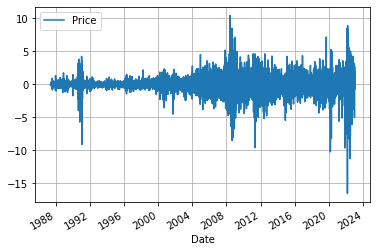

In [41]:
diffdf.plot(grid=True)

In [42]:
adf_test(diffdf)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                -1.555203e+01
p-value                        2.094083e-28
#Lags Used                     2.800000e+01
Number of Observations Used    9.026000e+03
Critical Value (1%)           -3.431075e+00
Critical Value (5%)           -2.861860e+00
Critical Value (10%)          -2.566940e+00
dtype: float64


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


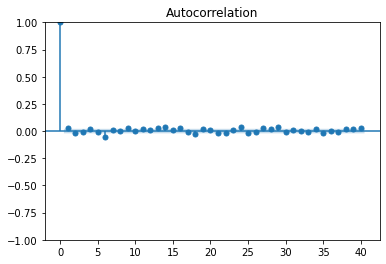

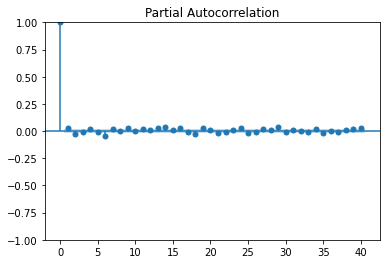

In [46]:
plot_acf(diffdf);
plot_pacf(diffdf);

In [50]:
!pip install pmdarima --q 
!pip install prophet --q 

In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [73]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(1284)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

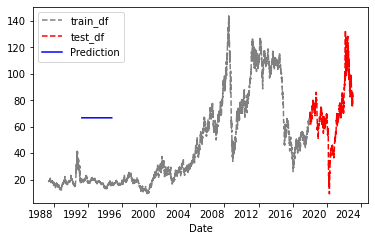

In [74]:
train_df['Price'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Price'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [75]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 1.0587326132630897
Test RMSE: 21.27153128337853
Train MAPE: 0.01587667226751576
Test MAPE: 0.276129513388774


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [71]:
ar = ARIMA(train_df, order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(1284)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [72]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 1.072090698057638
Test RMSE: 21.040431848481276
Train MAPE: 0.015983201966271898
Test MAPE: 0.28498821408300856


In [77]:
prophet_df = df.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.shape


(9056, 2)

In [84]:
prophet_df

ds      y
0    1987-05-20  18.63
1    1987-05-21  18.45
2    1987-05-22  18.55
3    1987-05-25  18.60
4    1987-05-26  18.63
...         ...    ...
9051 2023-01-17  84.38
9052 2023-01-18  83.78
9053 2023-01-19  85.08
9054 2023-01-20  86.96
9055 2023-01-23  87.54

[9056 rows x 2 columns]

In [90]:
prophet_train_df = prophet_df.iloc[:7772]
prophet_test_df = prophet_df.iloc[7772:]

In [92]:

prophet_test_df.shape

(1284, 2)

In [93]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df)

16:49:39 - cmdstanpy - INFO - Chain [1] start processing
16:49:53 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
future = prophet_model.make_future_dataframe(periods=1284)
prophet_predictions = prophet_model.predict(future)

In [97]:
prophet_predictions

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1987-05-20  16.304353    3.477246   29.945084    16.304353    16.304353   
1    1987-05-21  16.307877    4.242481   30.236228    16.307877    16.307877   
2    1987-05-22  16.311400    3.592416   30.025688    16.311400    16.311400   
3    1987-05-25  16.321972    3.648820   29.654137    16.321972    16.321972   
4    1987-05-26  16.325495    3.485909   28.540152    16.325495    16.325495   
...         ...        ...         ...         ...          ...          ...   
9051 2021-07-01 -13.019853  -43.163189   18.213485   -41.755852    17.090485   
9052 2021-07-02 -13.058112  -45.619695   19.448968   -41.875666    17.105268   
9053 2021-07-03 -13.096371  -42.680717   21.042415   -41.993216    17.098607   
9054 2021-07-04 -13.134630  -42.736840   21.206835   -42.110765    17.091945   
9055 2021-07-05 -13.172889  -45.330017   19.743436   -42.228315    17.085284   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.495138              0.495138              0.495138 -0.487462   
1           0.699651              0.699651              0.699651 -0.307398   
2           0.602323              0.602323              0.602323 -0.428229   
3           0.735789              0.735789              0.735789 -0.355675   
4           0.593106              0.593106              0.593106 -0.514290   
...              ...                   ...                   ...       ...   
9051        0.706356              0.706356              0.706356 -0.307398   
9052        0.623867              0.623867              0.623867 -0.428229   
9053        2.139321              2.139321              2.139321  1.046528   
9054        2.181974              2.181974              2.181974  1.046527   
9055        0.823958              0.823958              0.823958 -0.355675   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        -0.487462     -0.487462  0.982600      0.982600      0.982600   
1        -0.307398     -0.307398  1.007050      1.007050      1.007050   
2        -0.428229     -0.428229  1.030552      1.030552      1.030552   
3        -0.355675     -0.355675  1.091464      1.091464      1.091464   
4        -0.514290     -0.514290  1.107396      1.107396      1.107396   
...            ...           ...       ...           ...           ...   
9051     -0.307398     -0.307398  1.013754      1.013754      1.013754   
9052     -0.428229     -0.428229  1.052096      1.052096      1.052096   
9053      1.046528      1.046528  1.092793      1.092793      1.092793   
9054      1.046527      1.046527  1.135447      1.135447      1.135447   
9055     -0.355675     -0.355675  1.179633      1.179633      1.179633   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
9051                   0.0                         0.0   
9052                   0.0                         0.0   
9053                   0.0                         0.0   
9054                   0.0                         0.0   
9055                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0  16.799491  
1                            0.0  17.007528  
2                            0.0  16.913723  
3                            0.0  17.057761  
4                            0.0  16.918601  
...                          ...        ...  
9051                         0.0 -12.313498  
9052                         0.0 -12.434246  
9053                         0.0 -10.957051  
9054                         0.0 -10.952656  
9055                   

In [98]:
plot_plotly(prophet_model, prophet_predictions)

In [99]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:7772]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[7772:]['yhat']

C:\Users\admin\AppData\Local\Temp\ipykernel_2408\1593519358.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_2408\1593519358.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 10.268576679635792
Test RMSE: 65.95517233699259
Train MAPE: 0.16059050665564362
Test MAPE: 0.7957206196669319


In [102]:
import pickle

In [104]:
pickle.dump(prophet_model, open('prophetmodel.pickle','wb'))

In [105]:
!pip install -q streamlit
!npm install -g localtunnel -U

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

'npm' is not recognized as an internal or external command,
operable program or batch file.
